# Bias-variance tradeoff & validation set

In this lesson, I adress the main drawbacks of simple linear regression: use of only one predictor, and linearity...

In [404]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [405]:
def np_normalize(array):
    minimum = np.min(array)
    maximum = np.max(array)
    return (array - minimum) / (maximum - minimum)

def f_analytic_single (x):
    return -0.2*(x-5)**3+1.5*(x-5)**2+3

f_analytic_vec = np.vectorize(f_analytic_single)

def f_analytic(array):
    return np_normalize(f_analytic_vec(array))

<function matplotlib.pyplot.show(close=None, block=None)>

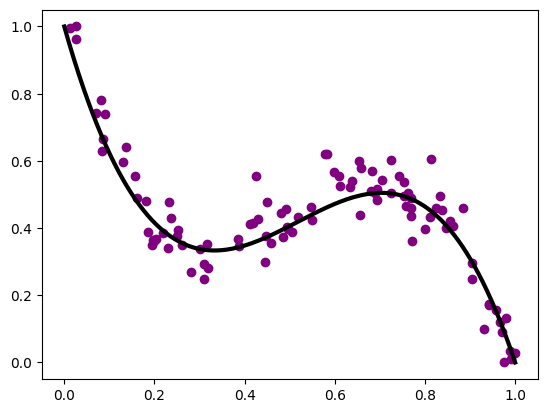

In [477]:
range_plot = np.array([0.5, 14])
refinement = 2000
sample_size = 100

x_plot = np.linspace(range_plot.min(),range_plot.max(),refinement)
x_random = np.sort(np.random.choice(x_plot, size=sample_size, replace=False))

y_analytic = f_analytic(x_plot)
y_data = np_normalize(f_analytic(x_random) + np.random.normal(loc=0,scale=0.06,size=sample_size))

x_data = (x_random - range_plot.min()) / (range_plot.max() - range_plot.min())

plt.plot(np_normalize(x_plot),y_analytic, color="black", linewidth=3)
plt.scatter(x_data, y_data, marker='o', color='purple')
plt.show

In [478]:
df = pd.DataFrame({'x':list(x_data), 'y':list(y_data)})
X = df[['x']]
y = df['y']

In [479]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

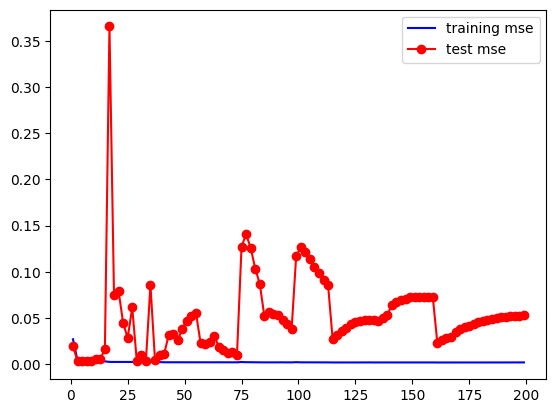

In [481]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

poly_degrees = [i for i in range(1,200,2)]
model_train_mse = []
model_test_mse = []
y_model_train = []
y_model_test = []

for deg in poly_degrees:
    X_poly_train = PolynomialFeatures(degree=deg).fit_transform(X_train)
    X_poly_test = PolynomialFeatures(degree=deg).fit_transform(X_test)
    
    model = LinearRegression(fit_intercept=False)
    model.fit(X_poly_train, y_train)

    y_model_train.append(model.predict(X_poly_train))
    y_model_test.append(model.predict(X_poly_test))

    mse_train = mean_squared_error(y_train, y_model_train[-1])
    mse_test = mean_squared_error(y_test, y_model_test[-1])
    
    model_train_mse.append(mse_train)
    model_test_mse.append(mse_test)


plt.plot(poly_degrees, model_train_mse, color='blue')
plt.plot(poly_degrees, model_test_mse, color='red', marker='o')
plt.legend(["training mse", "test mse"])

In [482]:
df_result = pd.DataFrame({'x':X_train.values.tolist(),'y_train': list(y_train), 'y_pred': list(y_model_train[np.array(poly_degrees).max()])})
df_result.sort_values(by='x',inplace=True)

plt.scatter(list(df_result['x']), list(df_result['y_train']), color='black')
plt.plot(list(df_result['x']), list(df_result['y_pred']), color='red')
plt.legend(['data points', 'model_prediction'])
plt.show()
print(X_train)

IndexError: list index out of range

Try to scale data before fitting... Training mse is expected to decrease as polynomial degree increases.